In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
df_dic = pd.read_excel('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/합본.xlsx')
print(df_dic[:100])

     단어    클래스
0    일본  항일+민족
1    민족  항일+민족
2    조선  항일+민족
3    독립  항일+민족
4    사람  항일+민족
..  ...    ...
95  러시아  항일+민족
96   국가  항일+민족
97   문명  항일+민족
98   학교  항일+민족
99   인민  항일+민족

[100 rows x 2 columns]


In [4]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG']
{'공화정 국가 수립 + 개혁적', '국제주의+세계적', '항일+민족', '비폭력(비무장)+평화', '폭력(무장)'}


In [5]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

     단어    클래스     품사태깅
0    일본  항일+민족   일본/NNP
1    민족  항일+민족   민족/NNG
2    조선  항일+민족   조선/NNP
3    독립  항일+민족   독립/NNG
4    사람  항일+민족   사람/NNG
..  ...    ...      ...
95  러시아  항일+민족  러시아/NNP
96   국가  항일+민족   국가/NNG
97   문명  항일+민족   문명/NNG
98   학교  항일+민족   학교/NNG
99   인민  항일+민족   인민/NNG

[100 rows x 3 columns]
['공화정 국가 수립 + 개혁적', '국제주의+세계적', '항일+민족', '비폭력(비무장)+평화', '폭력(무장)']


In [6]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

공화정 국가 수립 + 개혁적
['신경/NNG', '개성/NNG', '통재/NNG', '장님/NNG', '육군/NNG', '시체/NNG', '기념식/NNG', '쇠퇴/NNG', '효과/NNG', '육체/NNG', '육해군/NNG', '공민/NNG', '정오/NNG', '통상/MAG', '윤덕영/NNP', '곤궁/NNG', '홍/NNP', '간교/NNG', '정면/NNG', '강력/NNG', '기질/NNG', '들판/NNG', '원숭이/NNG', '설득/NNG', '원산/NNP', '낭독/NNG', '근/NNG', '이/MM', '쓸개/NNG', '물거품/NNG', '선전부/NNG', '씨/IC', '자유민보/NNG', '물산/NNG', '극동/NNP', '관심/NNG', '이리/MAG', '협력/NNG', '아들/NNG', '이리/MAG', '극단/NNG', '이목/NNG', '조리/NNG', '건전/NNG', '다리/NNG', '문관/NNG', '회계/NNG', '관문/NNG', '거울/NNG']
국제주의+세계적
['지/EC', '출병/NNG', '이탈리아/NNP', '배포/NNG', '약소민족/NNG', '배신/NNG', '조화/NNG', '계승/NNG', '중간/NNG', '꼴/NNG', '전부/MAG', '추밀부/NNG', '종족/NNG', '한미/NNP', '비준/NNG', '인사/NNG', '병신/NNG', '언급/NNG', '인명/NNG', '간파/NNG', '빙자/NNG', '구석/NNG', '예정/NNG', '변천/NNG', '결의문/NNG', '대수/NNG', '전반/NNG', '벽력/NNG', '경탄/NNG', '편집인/NNG', '준수/NNG', '인격/NNG', '사망자/NNG', '일행/NNG', '경향/NNG', '법규/NNG', '함양/NNG', '연출/NNG', '파리/NNP', '신세계/NNP', '소멸/NNG', '남대문/NNP', '회의장/NNG', '소생/NNG', '신자/NNG', '기약/NNG', '모집/NNG', '모자

In [7]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'일본/NNP': '항일+민족', '민족/NNG': '항일+민족', '조선/NNP': '항일+민족', '독립/NNG': '항일+민족', '사람/NNG': '항일+민족', '세계/NNG': '항일+민족', '나라/NNG': '항일+민족', '일/NNG': '항일+민족', '동포/NNG': '항일+민족', '말/NNG': '항일+민족', '자유/NNG': '항일+민족', '일본인/NNG': '항일+민족', '평화/NNG': '항일+민족', '하늘/NNG': '항일+민족', '정부/NNG': '항일+민족', '마음/NNG': '항일+민족', '조선인/NNG': '항일+민족', '행동/NNG': '항일+민족', '국민/NNG': '항일+민족', '생각/NNG': '항일+민족', '한국/NNP': '항일+민족', '정의/NNG': '항일+민족', '때/NNG': '항일+민족', '가운데/NNG': '항일+민족', '만세/IC': '항일+민족', '피/NNG': '항일+민족', '회의/NNG': '항일+민족', '아래/NNG': '항일+민족', '역사/NNG': '항일+민족', '백성/NNG': '항일+민족', '동안/NNG': '항일+민족', '자신/NNG': '항일+민족', '정신/NNG': '항일+민족', '운동/NNG': '항일+민족', '앞/NNG': '항일+민족', '소리/NNG': '항일+민족', '미국/NNP': '항일+민족', '나/NP': '항일+민족', '원수/NNG': '항일+민족', '대표/NNG': '항일+민족', '시대/NNG': '항일+민족', '이번/NNG': '항일+민족', '과거/NNG': '항일+민족', '생명/NNG': '항일+민족', '이상/NNG': '항일+민족', '세상/NNG': '항일+민족', '전쟁/NNG': '항일+민족', '동양/NNG': '항일+민족', '선언/NNG': '항일+민족', '후/IC': '항일+민족', '힘/NNG': '항일+민족', '뜻/NNG': '항일+민족', '속/NNG': '항일+민족', '형

In [8]:
# 데이터 불러오기
import re

fileDir = "C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/text/조선소요사건관계서류 & 소요사건에 관한 도장관보고.txt"
fr = open(fileDir, 'r', encoding='utf-8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

아 슬프도다 우리 이천만 동포여
태상황제 폐하께서 돌아가신 원인을 아느냐 모르느냐 평소 건강하셨으며 어디 편찮으시다는 말도 없었다 그런데 한 밤 중에 침실에서 갑자기 돌아가셨으니 이것이 어찌 이치에 맞는 일이란 말인가
우리가 파리강화회의에서 민족의 독립을 제창하여 저들에게 오점이 되자 일본인들은 간사하게도 한민족은 일본의 정치를 달게 받아들이고 있으며 독립을 바라지 않는다 고 하는 증명서를 제출하여 여러 나라의 눈과 귀를 속이려는 하였다
그래서 이완용을 귀족 대표 김윤식을 유림 대표 윤택영을 종친 대표 조중응과 송병준을 사회 대표 신흥우를 교육 종교계 대표로 내세워 이들로 하여금 증명서에 서명하고 도장을 찍은 후 태상황제가 이것을 비준하도록 압박하게 하였다
황제께서 크게 화를 내시며 엄하게 물리치시므로 저들은 또 다른 변고가 있을까 우려하여 이완용 역적을 시켜서 황제를 독살하도록 하였다 윤덕영과 한상학 두 역적이 수라를 받드는 두 궁녀를 시켜서 밤참으로 드시는 식혜에 독약을 타서 올리도록 하였다
황제께서는 옥체가 갑자기 악화되어 상처가 터지고 아홉 구멍에서 피를 쏟고 즉사하셨다 가슴이 무너지고 간담이 떨려서 아무 말도 할 수 없을 지경이다 그리고 나서는 두 궁녀에게까지 남은 약을 먹여 참혹하게 죽도록 하여 이로써 영영 입을 막아 버렸다
이처럼 저 역적들의 마음씨가 가면 갈수록 독해지고 있다 년 가을의 변고에 대해서 이를 부득부득 갈고 뼛속 깊이 새기며 한 차례 원한을 갚을 것을 기도하였지만 그 원한을 갚지 못한 까닭에 큰 변고가 거듭 일어나고 있는 것이다 우리 민족이 아직 살아남아 있는 한 어찌 한번 설욕하는 것을 잊을 수 있겠는가
또한 미국대통령 윌슨씨가 개조의 성명서를 발표한 후 민족자결의 목소리가 세상을 크게 울리고 폴란드 아일랜드 체코 등 개 나라는 동시에 독립을 이루었으니 우리 한민족도 어찌 이 기회를 놓칠 수 있겠는가 외국에 살고 있는 동포들은 이러한 기회를 틈타 국권을 회복하자고 소리 높여 외치며 눈물로 호소하고 있다 그러나 국내에 살고 있는 동포

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wjh20\AppData\Local\Temp\ipykernel_38840\3993878076.py:12: SyntaxWarning: invalid escape sequence '\s'
  content = re.sub('[\s]+', ' ', content).strip()


In [9]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""

MWEsList = open('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/복합어 사전.txt', encoding='UTF-8').readlines()

for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        for i in range(0,len(MWEsList)):
            eachMWEs = MWEsList[i].replace("\n","").strip()
            content = content.replace(eachMWEs, eachMWEs.replace(" ","_"))
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "NN" in eachOut[1] :
                if "_" in eachOut[0]:
                    resultContent = eachOut[0]+"/MWEs"
                else:
                    resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
            if "_" in eachOut[0]:
                result = eachOut[0] + "/MWEs"
            else:
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['동포/NNG', '태상/NNP', '황제/NNG', '폐하/NNG', '원인/NNG', '평소/NNG', '건강/NNG', '말/NNG', '밤/NNG', '중/NNB', '침실/NNG', '이치/NNG', '일/NNG', '말/NNG', '파리/NNP', '강화/NNG', '회의/NNG', '민족/NNG', '독립/NNG', '제창/NNG']
['아/IC', '슬프/VA', '도다/EC', '우리/NP', '이천만/NR', '동포/NNG', '여/JKV', '태상/NNP', '황제/NNG', '폐하/NNG', '께서/JKS', '돌아가/VV', '시/EP', 'ᆫ/ETM', '원인/NNG', '을/JKO', '알/VV', '느냐/EC', '모르/VV', '느냐/EC']
{'손/NNP', '든/EC', '지/NNB', '가만히/MAG', '용감/XR', '방심/NNG', '각/MM', '돌아오/VV', '도장/NNG', '아/IC', '설명/NNG', '적/XSN', '우연/NNG', '원래/MAG', '한반도/NNP', '었/EP', '사업/NNG', '우렁차/VA', '만/JX', '받들/VV', '정부/NNG', '징수/NNG', '비로소/MAG', '남/VV', '소굴/NNG', '어디/NP', '소리/NNG', '사이/NNG', '일으키/VV', '오르/VV', '도록/EC', '오/VV', '본보기/NNG', '으며/EC', '원한/NNG', '누구/NP', '뜻/NNG', '리/XSN', '촌리에/NNG', '노예/NNG', '부상/NNG', '동안/NNG', '기꺼이/MAG', '행정/NNG', '의사/NNG', '사랑/NNG', '네/MM', '법령/NNG', '님/XSN', '오랜/MM', '한상학/NNP', '발행/NNG', '두려워하/VV', '준비/NNG', '잠시/MAG', '한민족/NNG', '놓치/VV', '세계/NNG', '시국/NNG', '울리/VV', '너/NP', '교수/NNG', '노동/NNG', '거들떠보/VV', '

<Axes: xlabel='n', ylabel='word'>

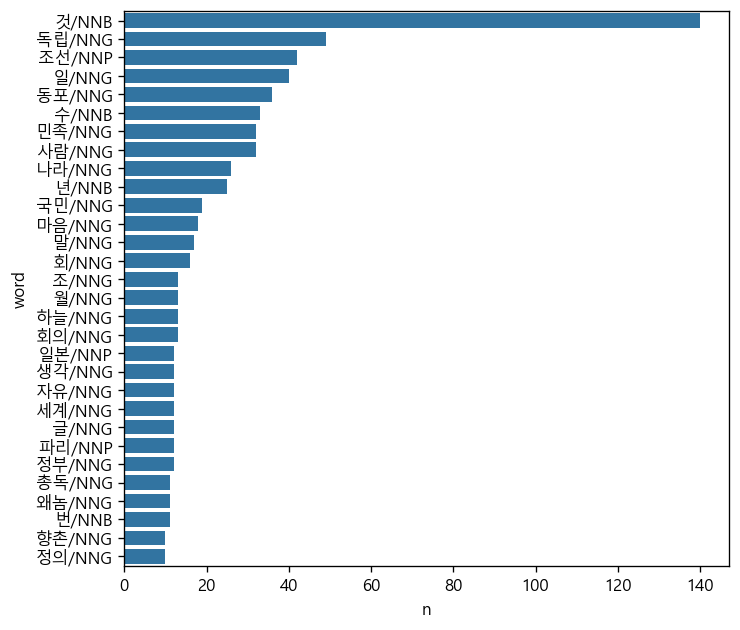

In [10]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

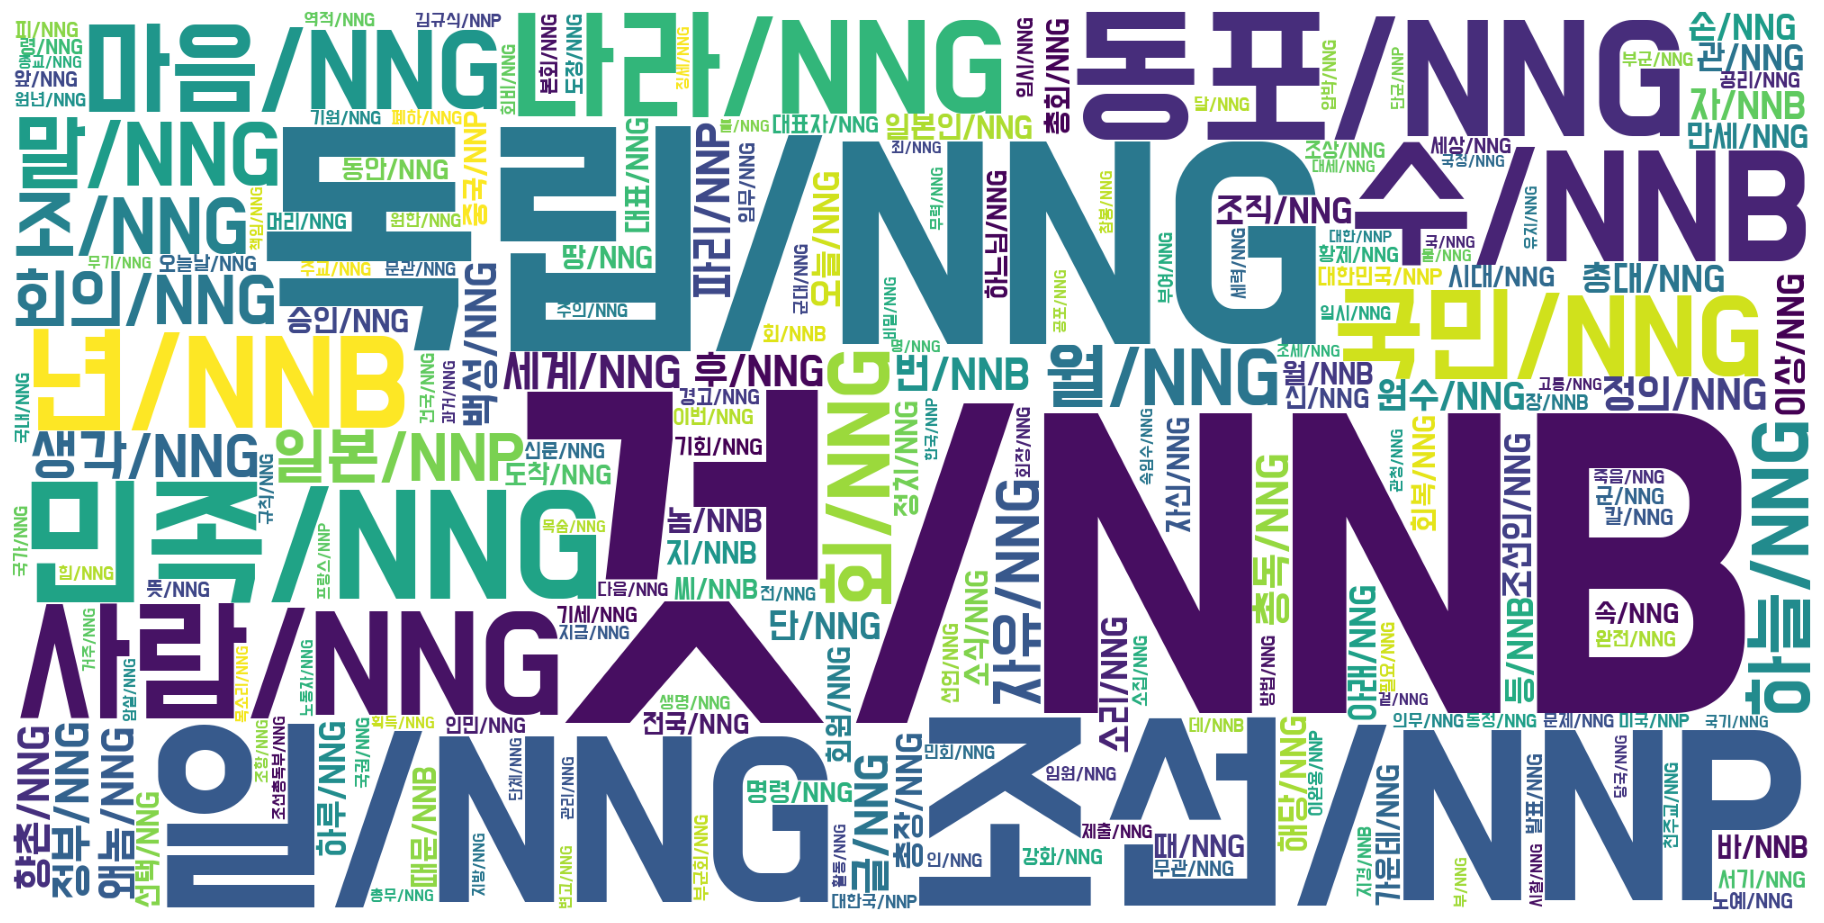

In [11]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = 'C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

                   0    1    2    3    4    5    6    7    8    9  ...  303  \
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                 304  305  306  307  308  309  310  311  312  
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 313 columns]


C:\Users\wjh20\AppData\Local\Temp\ipykernel_38840\3595135074.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0


                   0    1    2     3     4    5    6    7    8    9  ...  303  \
공화정 국가 수립 + 개혁적  0.0  0.0  0.0   0.0   0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
국제주의+세계적         0.0  0.0  0.0   2.0   1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   
항일+민족            1.0  5.0  2.0  18.0  10.0  5.0  1.0  5.0  2.0  2.0  ...  3.0   
비폭력(비무장)+평화      0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   
폭력(무장)           0.0  1.0  0.0   1.0   1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                 304  305  306  307   308  309  310  311  312  
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  
국제주의+세계적         3.0  0.0  0.0  0.0   0.0  0.0  1.0  0.0  0.0  
항일+민족            5.0  0.0  2.0  5.0  10.0  3.0  1.0  6.0  5.0  
비폭력(비무장)+평화      0.0  0.0  1.0  0.0   0.0  0.0  0.0  0.0  0.0  
폭력(무장)           0.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  

[5 rows x 313 columns]


In [13]:
import pandas as pd
from math import log

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

In [14]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\wjh20\AppData\Local\Temp\ipykernel_38840\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


                        0         1         2         3         4         5  \
공화정 국가 수립 + 개혁적  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
국제주의+세계적         0.000000  0.000000  0.000000  1.835779  0.917889  0.000000   
항일+민족            0.100756  0.503781  0.201513  1.813613  1.007563  0.503781   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
폭력(무장)           0.000000  1.939541  0.000000  1.939541  1.939541  0.000000   

                        6         7         8         9  ...       303  \
공화정 국가 수립 + 개혁적  2.219843  0.000000  0.000000  0.000000  ...  0.000000   
국제주의+세계적         0.000000  0.917889  0.000000  0.000000  ...  0.000000   
항일+민족            0.100756  0.503781  0.201513  0.201513  ...  0.302269   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  ...  3.443618   
폭력(무장)           0.000000  0.000000  0.000000  0.000000  ...  0.000000   

                      304  305       306       307       308       309  \
공화정 국가

In [15]:
corpus_tfidf_out.to_csv("C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/output/조선소요사건관계서류 & 소요사건에 관한 도장관보고.csv")

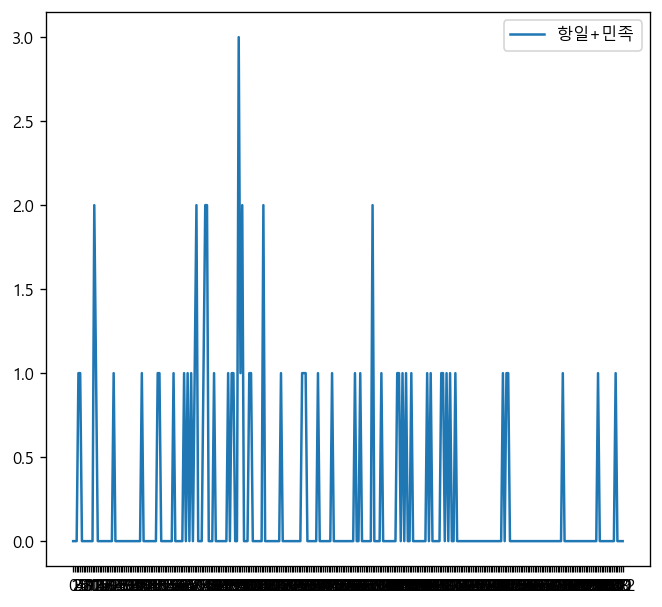

In [16]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['항일+민족']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '항일+민족')
plt.legend()
plt.show()

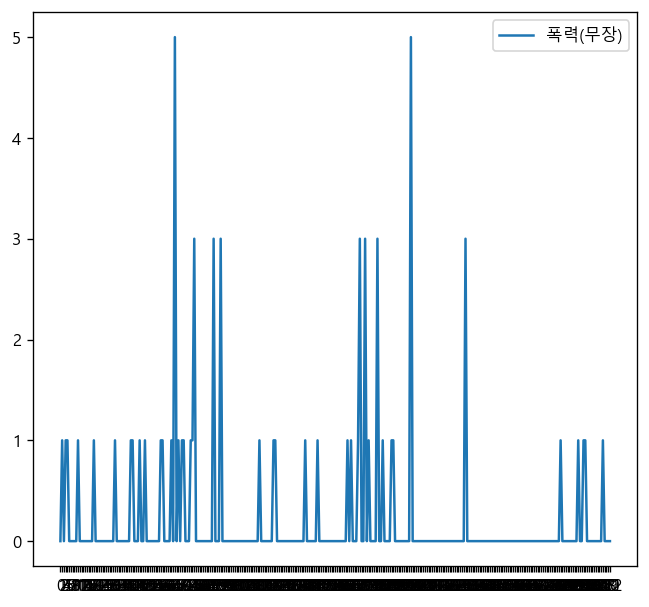

In [17]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['폭력(무장)']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '폭력(무장)')
plt.legend()
plt.show()

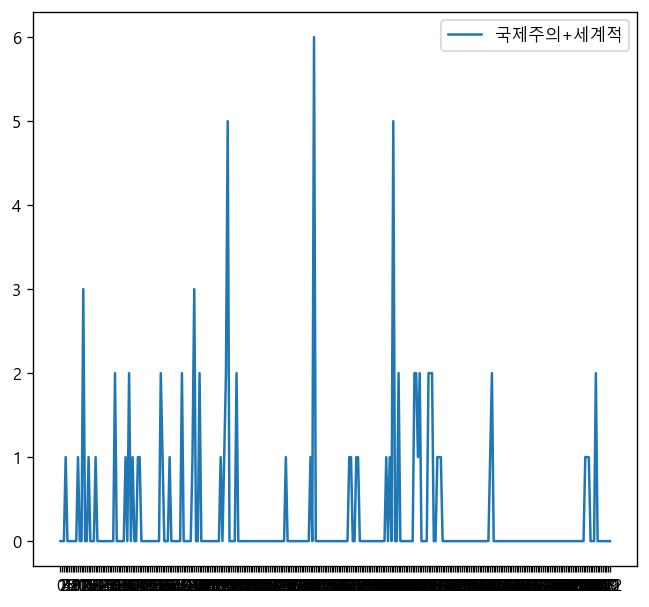

In [18]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['국제주의+세계적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '국제주의+세계적')
plt.legend()
plt.show()

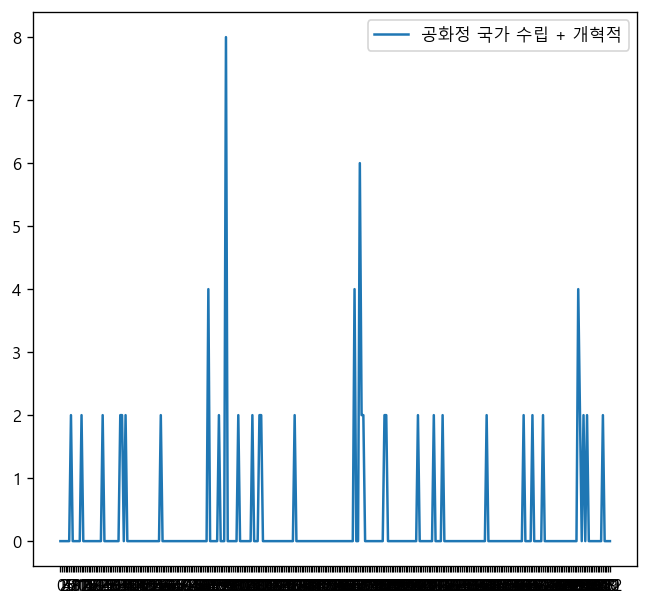

In [19]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['공화정 국가 수립 + 개혁적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '공화정 국가 수립 + 개혁적')
plt.legend()
plt.show()

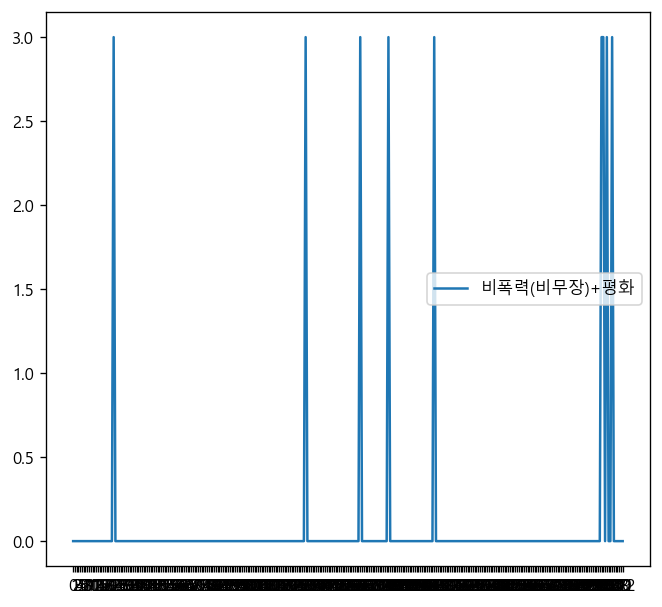

In [20]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['비폭력(비무장)+평화']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '비폭력(비무장)+평화')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

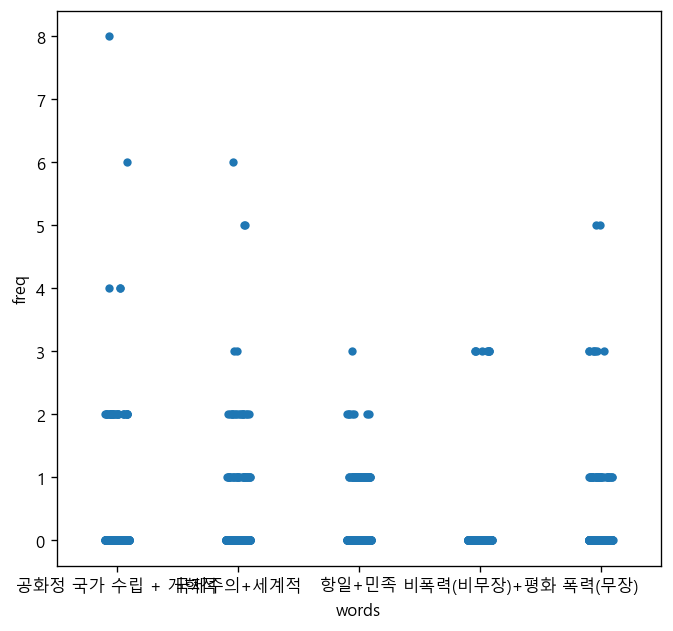

In [21]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF

inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

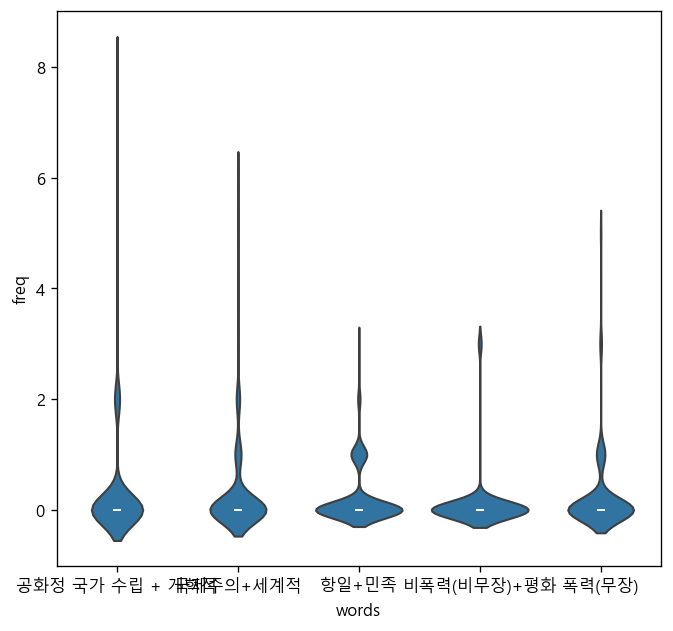

In [22]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

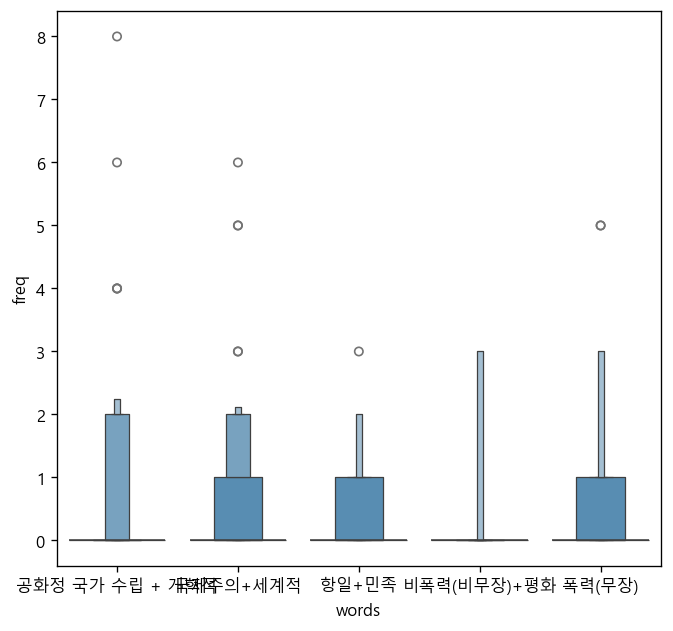

In [23]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)